# Análise de dados eleitorais: 
### Análise por gênero e faixa etária
Análise de dados eleitorais de 2020 utilizando como principal assunto o gênero e faixa etária dos eleitores.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
file = r'C:\Users\lucas\Documents\analise_dados\perfil_eleitorado_ATUAL.csv'
df = pd.read_csv(file, delimiter=';',
                 error_bad_lines=False, encoding='latin1')

In [3]:
df.shape

(4306904, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306904 entries, 0 to 4306903
Data columns (total 21 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRIA        int64 
 7   DS_MUN_SIT_BIOMETRIA        object
 8   NR_ZONA                     int64 
 9   CD_GENERO                   int64 
 10  DS_GENERO                   object
 11  CD_ESTADO_CIVIL             int64 
 12  DS_ESTADO_CIVIL             object
 13  CD_FAIXA_ETARIA             int64 
 14  DS_FAIXA_ETARIA             object
 15  CD_GRAU_ESCOLARIDADE        int64 
 16  DS_GRAU_ESCOLARIDADE        object
 17  QT_ELEITORES_PERFIL         int64 
 18  QT_ELEITORES_BIOMETRIA      int64 
 19  QT_ELEITORES_DEFICIENCIA    int64 
 20  QT

In [5]:
df.sample(20)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
3658314,11/11/2020,21:20:42,9999,SE,31135,BREJO GRANDE,-1,#NULO#,15,4,FEMININO,3,CASADO,8084,80 a 84 anos,2,LÊ E ESCREVE,5,5,0,0
3714761,11/11/2020,21:20:42,9999,SP,64939,IBITINGA,-1,#NULO#,49,4,FEMININO,9,DIVORCIADO,5559,55 a 59 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,143,141,0,0
1101270,11/11/2020,21:20:42,9999,MG,40940,JUVENÍLIA,-1,#NULO#,342,4,FEMININO,3,CASADO,4549,45 a 49 anos,7,SUPERIOR INCOMPLETO,1,0,0,0
115139,11/11/2020,21:20:42,9999,SP,61395,ANALÂNDIA,-1,#NULO#,245,2,MASCULINO,1,SOLTEIRO,5054,50 a 54 anos,7,SUPERIOR INCOMPLETO,3,3,0,0
748403,11/11/2020,21:20:42,9999,SP,69698,RIBEIRÃO PRETO,-1,#NULO#,266,2,MASCULINO,9,DIVORCIADO,7074,70 a 74 anos,6,ENSINO MÉDIO COMPLETO,19,15,0,0
1034,11/11/2020,21:20:42,9999,RS,88986,ACEGUÁ,-1,#NULO#,7,2,MASCULINO,3,CASADO,8589,85 a 89 anos,2,LÊ E ESCREVE,1,1,0,0
1409531,11/11/2020,21:20:42,9999,PA,4472,CASTANHAL,-1,#NULO#,50,2,MASCULINO,3,CASADO,2529,25 a 29 anos,8,SUPERIOR COMPLETO,12,12,0,0
2001400,11/11/2020,21:20:42,9999,MG,52531,SÃO JOÃO DO PARAÍSO,-1,#NULO#,237,4,FEMININO,9,DIVORCIADO,3034,30 a 34 anos,5,ENSINO MÉDIO INCOMPLETO,2,0,0,0
203106,11/11/2020,21:20:42,9999,RS,84735,ÁUREA,-1,#NULO#,3,4,FEMININO,9,DIVORCIADO,3539,35 a 39 anos,7,SUPERIOR INCOMPLETO,1,1,0,0
600271,11/11/2020,21:20:42,9999,BA,34070,CAIRU,-1,#NULO#,31,2,MASCULINO,9,DIVORCIADO,8084,80 a 84 anos,2,LÊ E ESCREVE,1,1,0,0


In [6]:
df.groupby('CD_GENERO')['DS_GENERO'].max()

CD_GENERO
0    NÃO INFORMADO
2        MASCULINO
4         FEMININO
Name: DS_GENERO, dtype: object

<AxesSubplot:title={'center':'Quantidade de eleitores por faixa etária em Jacareí '}, xlabel='Faixa Etária', ylabel='Quantidade de eleitores'>

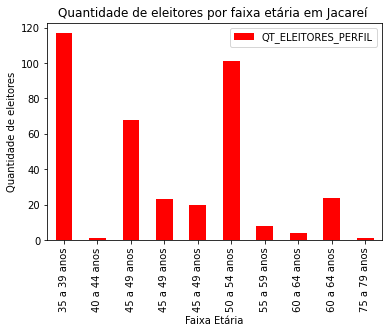

In [7]:
mun = df.query('NM_MUNICIPIO == "JACAREÍ"')
mun.tail(10).plot(kind='bar',
                 x='DS_FAIXA_ETARIA', y='QT_ELEITORES_PERFIL', color='RED', title='Quantidade de eleitores por faixa etária em Jacareí ', 
                  xlabel='Faixa Etária', ylabel='Quantidade de eleitores')

TypeError: no numeric data to plot